In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#LOADING DATA SET FOR HOUSE PRICE PREDICTION

In [3]:
data = pd.read_csv("housing.csv")

In [5]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# DATA EXPLORATION WHETHER THE VALUE IS NON-NULL OR NOT

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [13]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [15]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [17]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [19]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2)

In [21]:
train_data = X_train.join(y_train)

In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18083,-122.06,37.33,29.0,1945.0,269.0,826.0,275.0,8.2480,<1H OCEAN,498800.0
20453,-118.78,34.27,20.0,2743.0,685.0,1798.0,613.0,3.6761,<1H OCEAN,170900.0
11578,-118.03,33.77,21.0,3803.0,898.0,1511.0,829.0,3.0000,<1H OCEAN,221200.0
12239,-116.93,33.73,13.0,3603.0,573.0,1644.0,515.0,4.0433,INLAND,132300.0
10862,-117.87,33.70,21.0,3648.0,654.0,2266.0,628.0,5.0956,<1H OCEAN,246000.0
...,...,...,...,...,...,...,...,...,...,...
15369,-117.25,33.38,16.0,3536.0,765.0,2007.0,687.0,3.0000,<1H OCEAN,146700.0
18720,-122.37,40.60,7.0,5178.0,1336.0,2557.0,1283.0,2.4079,INLAND,111400.0
17239,-119.69,34.43,30.0,1273.0,343.0,1082.0,325.0,2.5104,<1H OCEAN,228100.0
7152,-118.16,34.03,41.0,1377.0,293.0,1142.0,272.0,3.1724,<1H OCEAN,141600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

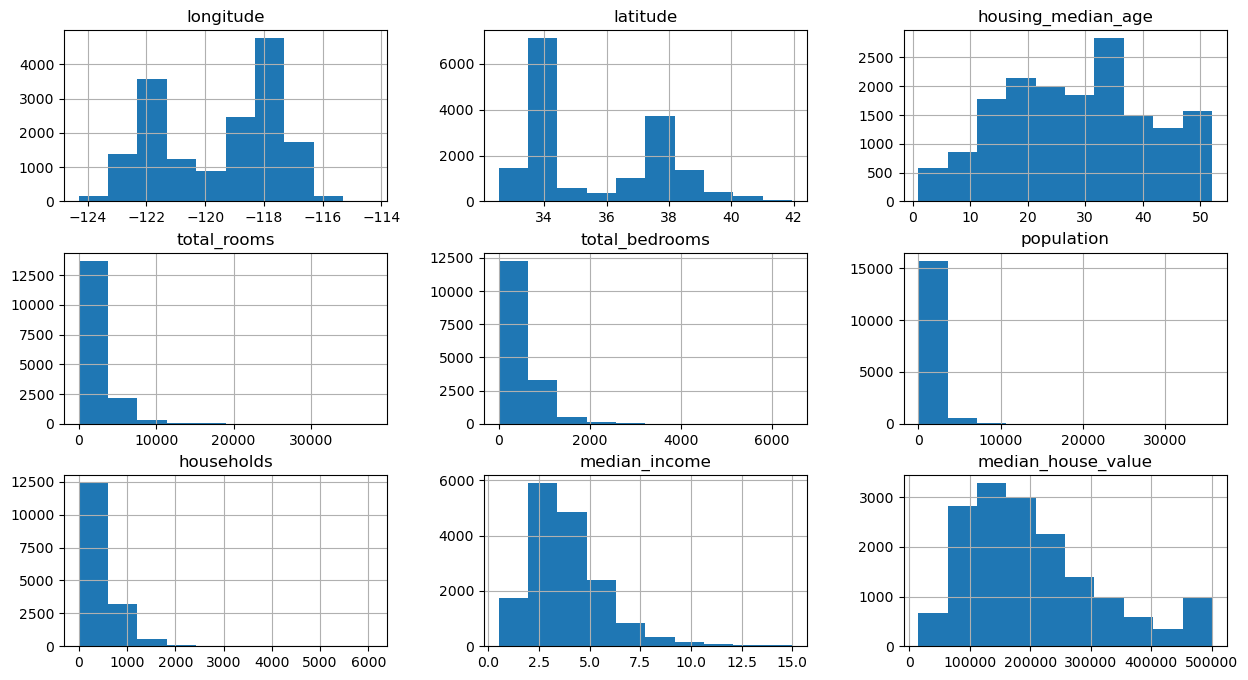

In [25]:
train_data.hist(figsize=(15,8))

THE ABOVE DATA IS SKEWED DATA

1. MODE > MEDIAN > MEAN---------POSITIVE SKEWNESS(RIGHT)
2. MEAN = MODE = MEDIAN---------NO SKEWNESS
3. MEAN < MEDIAN < MODE---------NEGATIVE SKEWNESS(LEFT)



In [27]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924997,-0.112976,0.048973,0.071809,0.099045,0.057423,-0.014203,-0.045412
latitude,-0.924997,1.000000,0.014881,-0.038610,-0.067682,-0.107321,-0.071299,-0.079486,-0.142718
housing_median_age,-0.112976,0.014881,1.000000,-0.359268,-0.320974,-0.293640,-0.302296,-0.113746,0.109867
total_rooms,0.048973,-0.038610,-0.359268,1.000000,0.930827,0.856427,0.918694,0.193845,0.129645
total_bedrooms,0.071809,-0.067682,-0.320974,0.930827,1.000000,0.876821,0.979423,-0.009701,0.044642
population,0.099045,-0.107321,-0.293640,0.856427,0.876821,1.000000,0.906470,0.002304,-0.026640
households,0.057423,-0.071299,-0.302296,0.918694,0.979423,0.906470,1.000000,0.010823,0.059700
median_income,-0.014203,-0.079486,-0.113746,0.193845,-0.009701,0.002304,0.010823,1.000000,0.689210
median_house_value,-0.045412,-0.142718,0.109867,0.129645,0.044642,-0.026640,0.059700,0.689210,1.000000



1. Every feature has correlation of 1 with itself.
2. Median_income correlates highly with the median_house_value.


<Axes: >

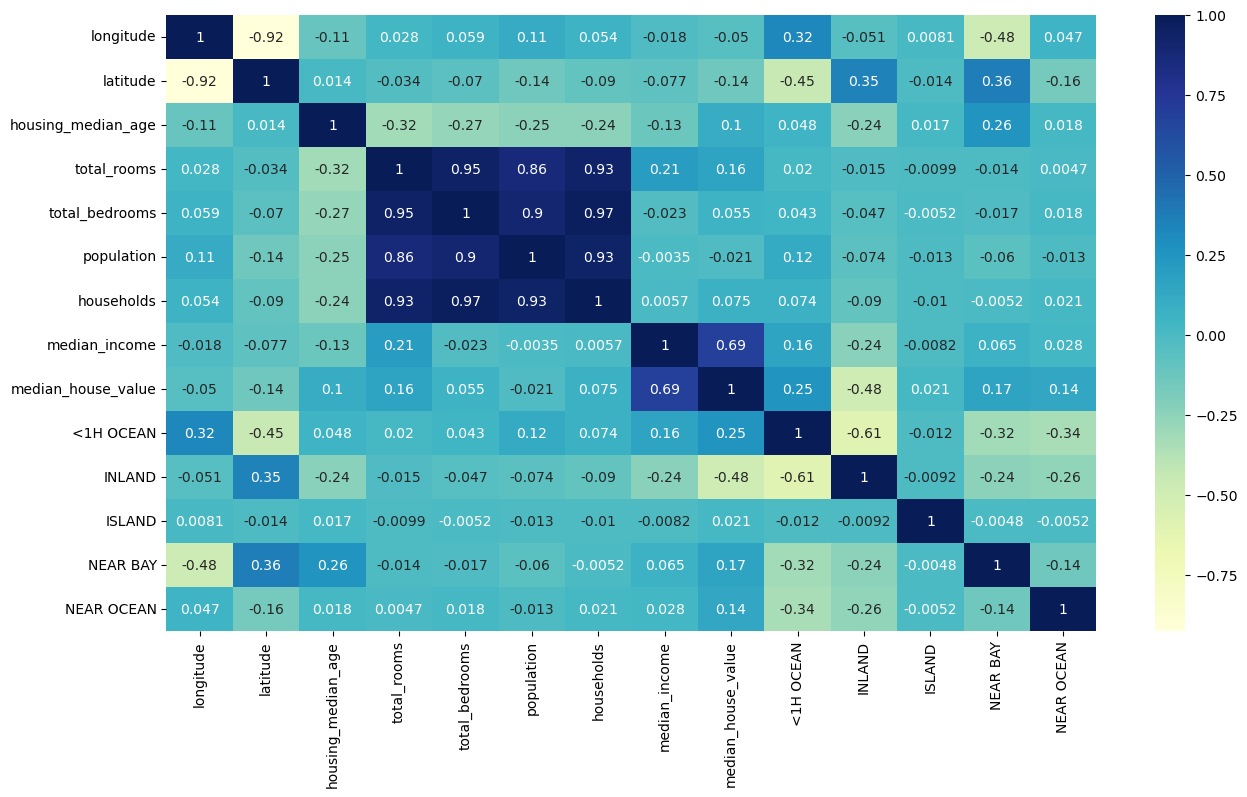

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True) ,annot=True,cmap= "YlGnBu")

# DATA PREPROCESSING

# np.log() to reduce skewness, handle outliers, normalize data, and help linear models perform better.
# +1 to avoid error if feature has 0 value.

In [29]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

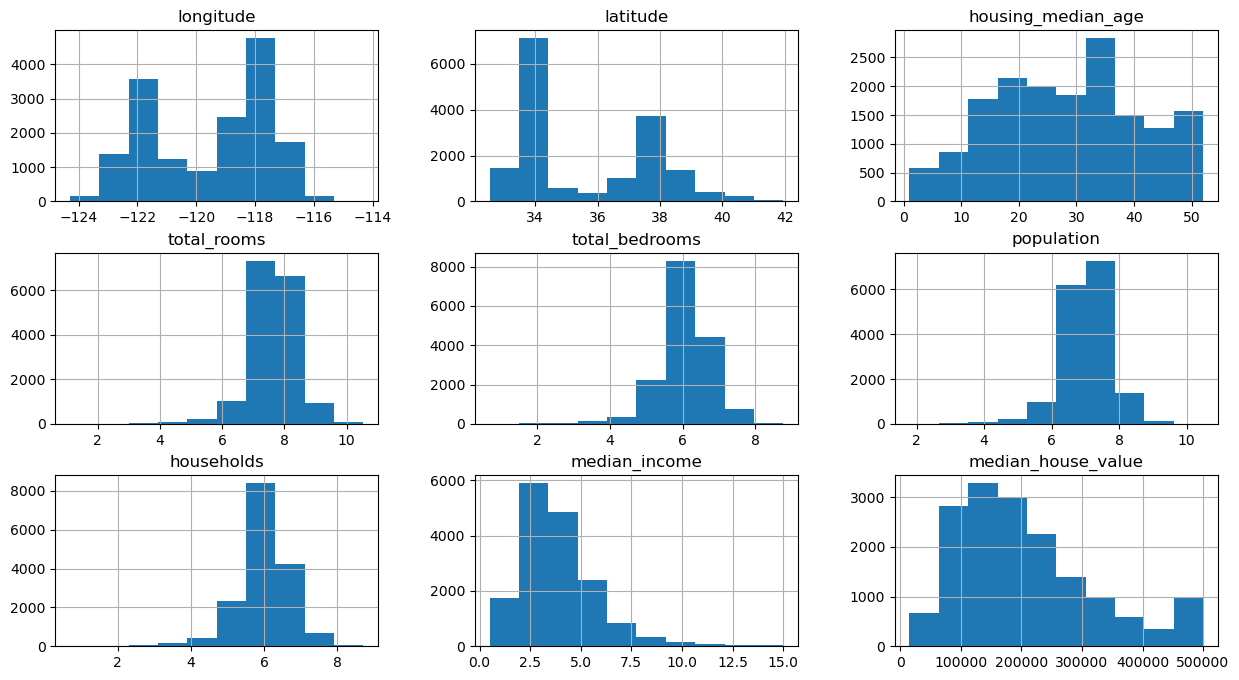

In [31]:
train_data.hist(figsize=(15,8))

In [37]:
pd.get_dummies(train_data['ocean_proximity'], dtype = int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17089,0,0,0,0,1
6625,1,0,0,0,0
11555,1,0,0,0,0
12140,0,1,0,0,0
291,0,0,0,1,0
...,...,...,...,...,...
10652,1,0,0,0,0
10456,1,0,0,0,0
11528,1,0,0,0,0
10026,0,1,0,0,0


# The ocean_proximity data is now converted into int type.

In [33]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7196
INLAND        5207
NEAR OCEAN    2132
NEAR BAY      1806
ISLAND           5
Name: count, dtype: int64

In [41]:
intOcean = pd.get_dummies(train_data['ocean_proximity'], dtype = int)
intOcean

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18083,1,0,0,0,0
20453,1,0,0,0,0
11578,1,0,0,0,0
12239,0,1,0,0,0
10862,1,0,0,0,0
...,...,...,...,...,...
15369,1,0,0,0,0
18720,0,1,0,0,0
17239,1,0,0,0,0
7152,1,0,0,0,0


Ocean proximity is now coverted into the binary form......

In [53]:
intOcean1 = train_data.join(intOcean)
intOcean1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18083,-122.06,37.33,29.0,7.573531,5.598422,6.717805,5.620401,8.2480,<1H OCEAN,498800.0,1,0,0,0,0
20453,-118.78,34.27,20.0,7.917172,6.530878,7.494986,6.419995,3.6761,<1H OCEAN,170900.0,1,0,0,0,0
11578,-118.03,33.77,21.0,8.243808,6.801283,7.321189,6.721426,3.0000,<1H OCEAN,221200.0,1,0,0,0,0
12239,-116.93,33.73,13.0,8.189800,6.352629,7.405496,6.246107,4.0433,INLAND,132300.0,0,1,0,0,0
10862,-117.87,33.70,21.0,8.202208,6.484635,7.726213,6.444131,5.0956,<1H OCEAN,246000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15369,-117.25,33.38,16.0,8.171034,6.641182,7.604894,6.533789,3.0000,<1H OCEAN,146700.0,1,0,0,0,0
18720,-122.37,40.60,7.0,8.552367,7.198184,7.846981,7.157735,2.4079,INLAND,111400.0,0,1,0,0,0
17239,-119.69,34.43,30.0,7.149917,5.840642,6.987490,5.786897,2.5104,<1H OCEAN,228100.0,1,0,0,0,0
7152,-118.16,34.03,41.0,7.228388,5.683580,7.041412,5.609472,3.1724,<1H OCEAN,141600.0,1,0,0,0,0


The above data consist of ocean binary form + ocean_proximity

In [65]:
train_data = intOcean1.drop(['ocean_proximity'] , axis = 1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18083,-122.06,37.33,29.0,7.573531,5.598422,6.717805,5.620401,8.2480,498800.0,1,0,0,0,0
20453,-118.78,34.27,20.0,7.917172,6.530878,7.494986,6.419995,3.6761,170900.0,1,0,0,0,0
11578,-118.03,33.77,21.0,8.243808,6.801283,7.321189,6.721426,3.0000,221200.0,1,0,0,0,0
12239,-116.93,33.73,13.0,8.189800,6.352629,7.405496,6.246107,4.0433,132300.0,0,1,0,0,0
10862,-117.87,33.70,21.0,8.202208,6.484635,7.726213,6.444131,5.0956,246000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15369,-117.25,33.38,16.0,8.171034,6.641182,7.604894,6.533789,3.0000,146700.0,1,0,0,0,0
18720,-122.37,40.60,7.0,8.552367,7.198184,7.846981,7.157735,2.4079,111400.0,0,1,0,0,0
17239,-119.69,34.43,30.0,7.149917,5.840642,6.987490,5.786897,2.5104,228100.0,1,0,0,0,0
7152,-118.16,34.03,41.0,7.228388,5.683580,7.041412,5.609472,3.1724,141600.0,1,0,0,0,0


From train_data Ocean proximity have been removed......but ocean binary form is present

<Axes: >

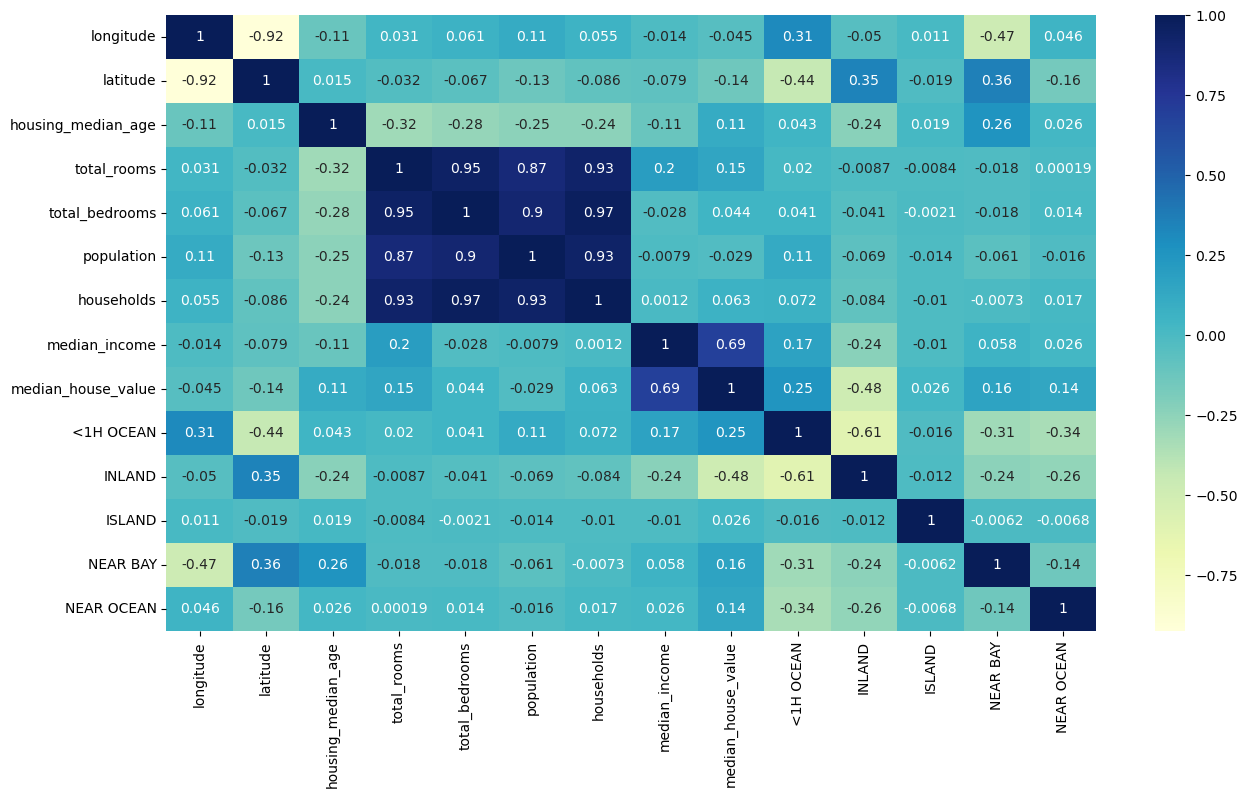

In [67]:
train_data
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True) ,annot=True,cmap= "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

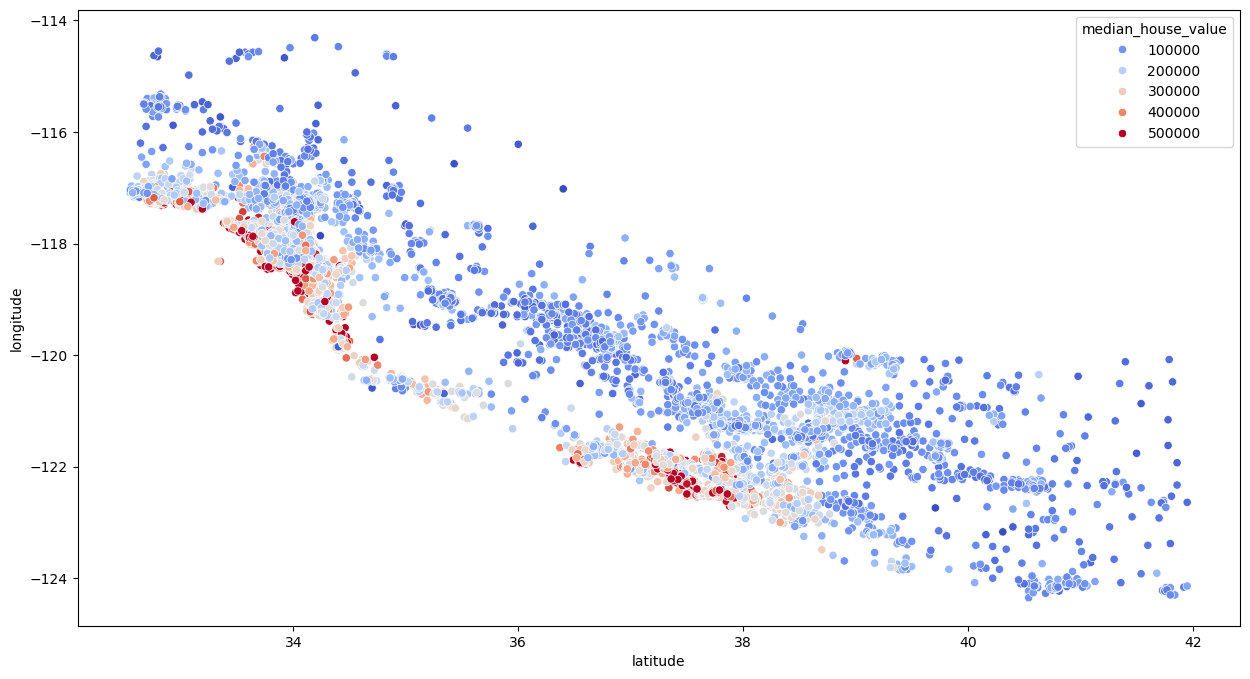

In [60]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude" , y="longitude" , data = train_data, hue= "median_house_value", palette = "coolwarm")

The above scatterplot represents variation of the median_house_value with the longitudinal and latitudinal of the region

In [ ]:
# FEATURE ENGINEERING - use to transform raw data into features that are suitable for machine learning model

In [69]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_ratio'] = train_data['total_rooms'] / train_data['households']

<Axes: >

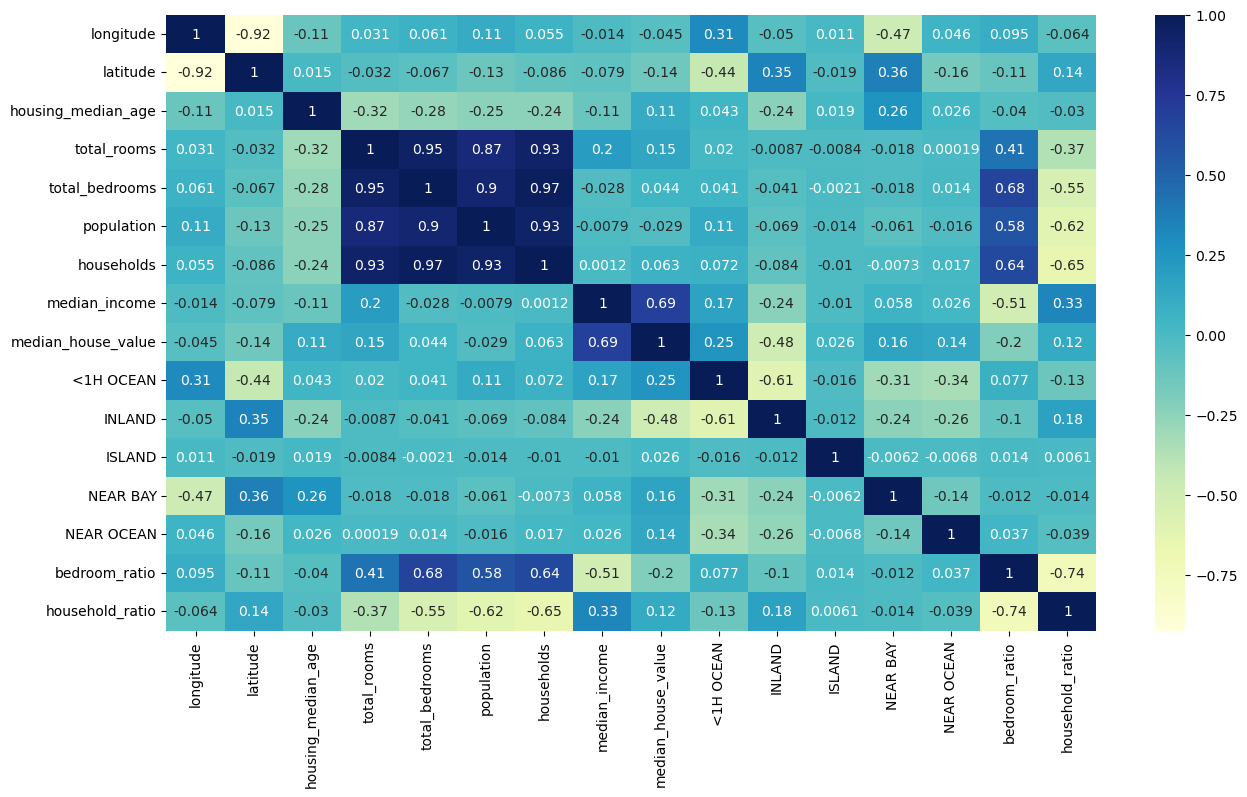

In [71]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True) ,annot=True,cmap= "YlGnBu")

# LINEAR REGRESSION MODELS

# Linear regression is a type of supervised machine-learning algorithm 
# learns from the labelled datasets and maps the data points with most optimized linear functions which can be used for prediction on new datasets.

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train = train_data.drop(['median_house_value'], axis=1) 
y_train = train_data['median_house_value']

reg = LinearRegression()


reg.fit(X_train, y_train)

LinearRegression()

In [93]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = intOcean1.drop(['ocean_proximity'] , axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_ratio'] = test_data['total_rooms'] / test_data['households']



In [95]:
X_test = test_data.drop(['median_house_value'], axis=1) 
y_test = test_data['median_house_value']

In [97]:
reg.score(X_test, y_test)                     

0.6672758685929856

From Linear Regression the evaluation R² score ........66.7% variance with raw data(Unscaled)



In [107]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
reg.fit(X_train_s, y_train)
X_test_s = scaler.transform(X_test)
reg.score(X_test_s, y_test)

0.6672758685929856

From Linear Regression the evaluation R² score ........66.7% variance after scaling train and test data




# RANDOM FOREST MODEL

# Random forest algorithm in machine learning is a supervised classification algorithm that 
# It addresses the issue of overfitting in decision trees through an ensemble approach. 
# It consists of multiple decision trees constructed randomly by selecting features from the dataset.

In [109]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [125]:
ForestResult = forest.score(X_test, y_test)

In [127]:
ForestResult

0.9732743171219457

From Random Forest Regressor we got this is a very high R² score ...........97.3% of the variance...........which is significantly better than linear regression.

In [129]:
y_pred = forest.predict(X_test)

In [131]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

y_test shape: (16346,)
y_pred shape: (16346,)


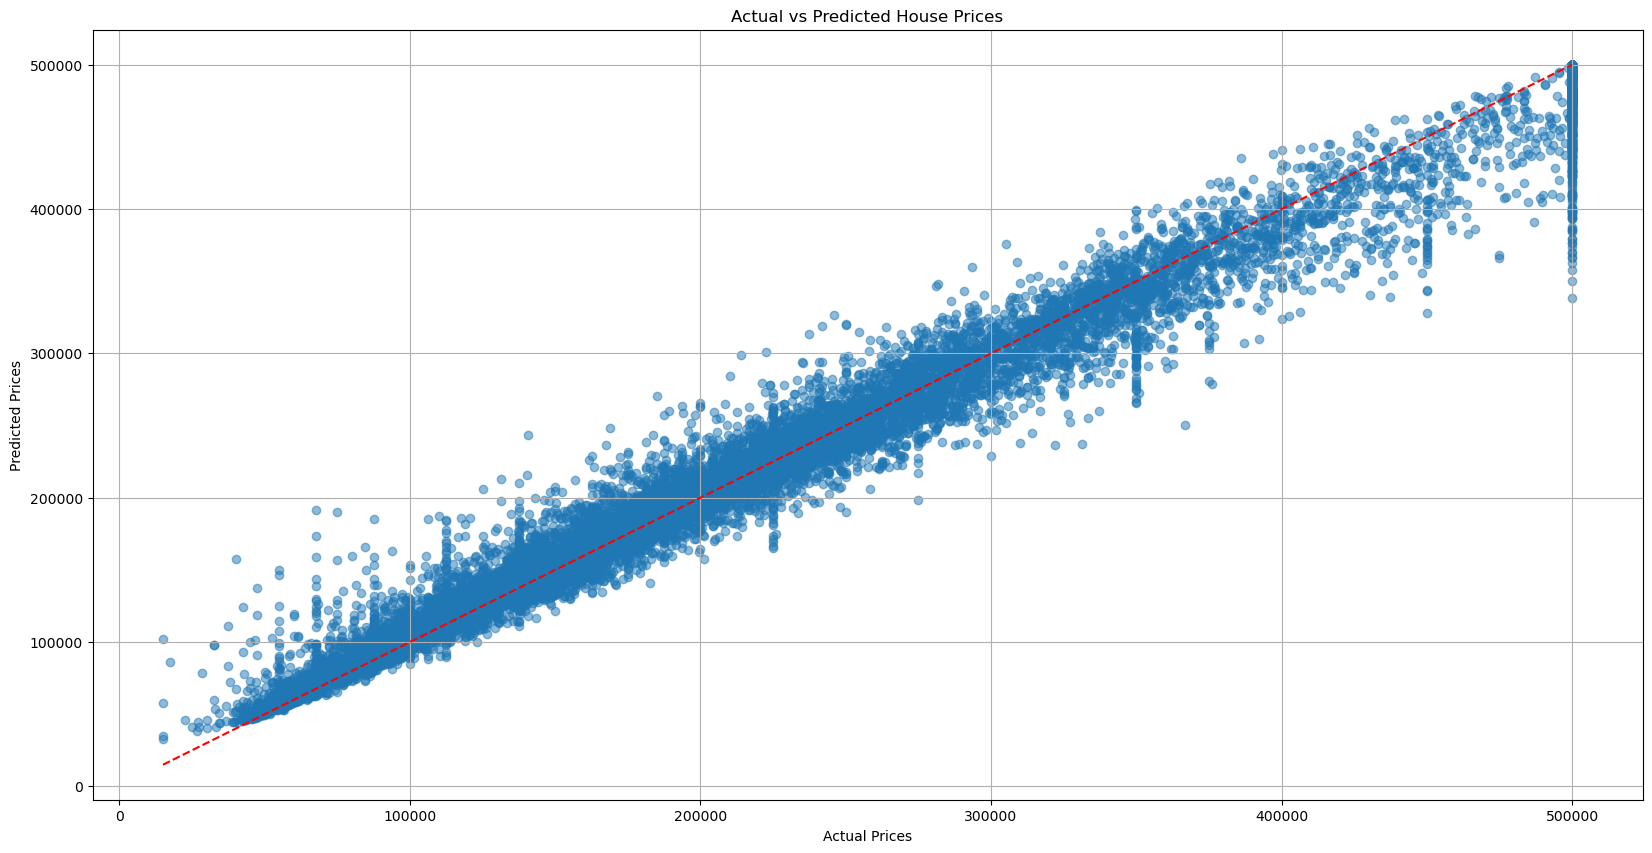

In [143]:

plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.show()